In [3]:
import sqlite3

In [5]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [7]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

In [11]:
cursor.executemany("""
INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)
""", [
    ("2025-01-01", "Laptop", 1, 55000),
    ("2025-01-03", "Mouse", 3, 500),
    ("2025-01-05", "Keyboard", 2, 1500),
    ("2025-01-06", "Laptop", 1, 56000),
    ("2025-01-08", "Headset", 2, 2000)
])

conn.commit()
conn.close()

print("sales_data.db created successfully!")

sales_data.db created successfully!


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
conn = sqlite3.connect("sales_data.db")

In [17]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

In [19]:
df = pd.read_sql_query(query, conn)

=== Sales Summary ===
    product  total_qty   revenue
0   Headset          4    8000.0
1  Keyboard          4    6000.0
2    Laptop          4  222000.0
3     Mouse          6    3000.0


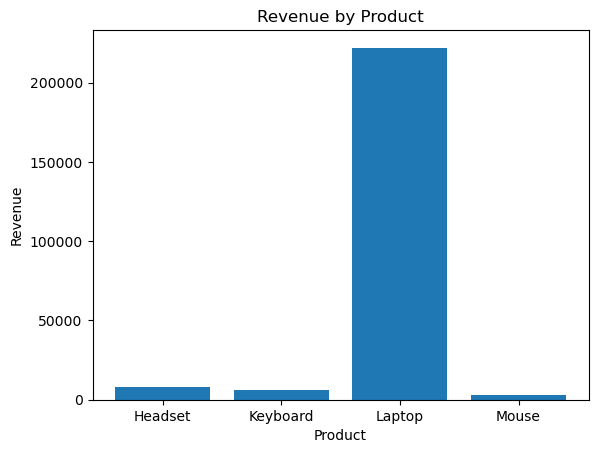

In [21]:
print("=== Sales Summary ===")
print(df)

# Plot bar chart
plt.bar(df['product'], df['revenue'])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show()

conn.close()

In [23]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>